In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
path="C:\\Users\\spoorthi s jain\\Desktop\\Internship\\machine learning\\2022projects\\Logistic\\Predcit fracture or not\\bmd.csv"
data=pd.read_csv(path)
print(data)
print(data.info())

        id        age sex     fracture  weight_kg  height_cm      medication  \
0      469  57.052768   F  no fracture       64.0      155.5  Anticonvulsant   
1     8724  75.741225   F  no fracture       78.0      162.0   No medication   
2     6736  70.778900   M  no fracture       73.0      170.5   No medication   
3    24180  78.247175   F  no fracture       60.0      148.0   No medication   
4    17072  54.191877   M  no fracture       55.0      161.0   No medication   
..     ...        ...  ..          ...        ...        ...             ...   
164  21892  77.982543   M     fracture       74.0      164.0   No medication   
165  24140  50.285303   F     fracture       59.0      161.0   No medication   
166   6969  46.359721   M     fracture       67.0      169.0   No medication   
167   5505  54.788368   M     fracture       70.0      166.0   No medication   
168     71  69.994822   F     fracture       68.5      165.0   No medication   

     waiting_time     bmd  
0          

In [2]:
data.isnull().sum()

id              0
age             0
sex             0
fracture        0
weight_kg       0
height_cm       0
medication      0
waiting_time    0
bmd             0
dtype: int64

In [3]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
data['sex'] = le_sex.fit_transform(data['sex'])
le_med = LabelEncoder()
data['medication'] = le_med.fit_transform(data['medication'])
le_fract = LabelEncoder()
data['fracture'] = le_fract.fit_transform(data['fracture'])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            169 non-null    int64  
 1   age           169 non-null    float64
 2   sex           169 non-null    int32  
 3   fracture      169 non-null    int32  
 4   weight_kg     169 non-null    float64
 5   height_cm     169 non-null    float64
 6   medication    169 non-null    int32  
 7   waiting_time  169 non-null    int64  
 8   bmd           169 non-null    float64
dtypes: float64(4), int32(3), int64(2)
memory usage: 10.0 KB


In [5]:
data

,id,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
0,469,57.052768,0,1,64.0,155.5,0,18,0.8793
1,8724,75.741225,0,1,78.0,162.0,2,56,0.7946
2,6736,70.778900,1,1,73.0,170.5,2,10,0.9067
3,24180,78.247175,0,1,60.0,148.0,2,14,0.7112
4,17072,54.191877,1,1,55.0,161.0,2,20,0.7909
...,...,...,...,...,...,...,...,...,...
164,21892,77.982543,1,0,74.0,164.0,2,49,0.7941
165,24140,50.285303,0,0,59.0,161.0,2,6,0.7971
166,6969,46.359721,1,0,67.0,169.0,2,10,0.8037
167,5505,54.788368,1,0,70.0,166.0,2,14,0.8072


<AxesSubplot:>

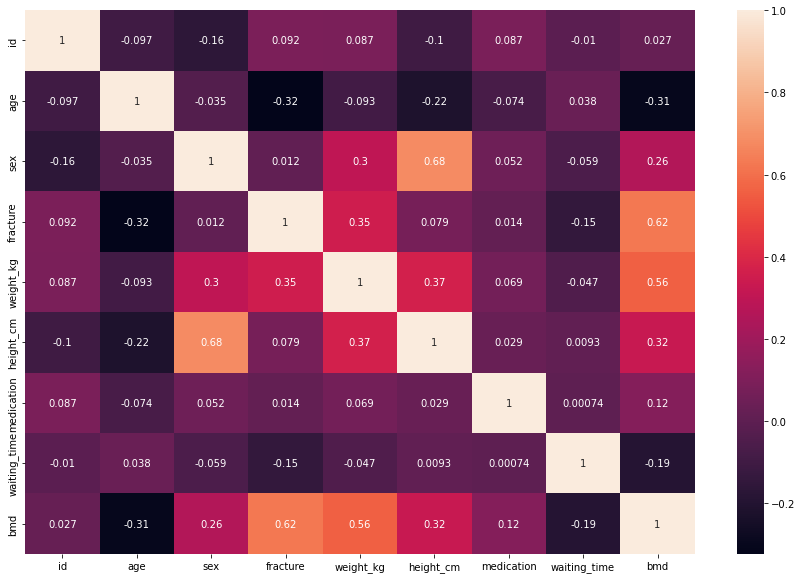

In [6]:
corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

In [7]:
inputs=data.drop(['fracture', 'id'],'columns')
output=data.drop(['id','age','sex','weight_kg','height_cm','medication','waiting_time','bmd'],'columns')
print(inputs)
print(output)

           age  sex  weight_kg  height_cm  medication  waiting_time     bmd
0    57.052768    0       64.0      155.5           0            18  0.8793
1    75.741225    0       78.0      162.0           2            56  0.7946
2    70.778900    1       73.0      170.5           2            10  0.9067
3    78.247175    0       60.0      148.0           2            14  0.7112
4    54.191877    1       55.0      161.0           2            20  0.7909
..         ...  ...        ...        ...         ...           ...     ...
164  77.982543    1       74.0      164.0           2            49  0.7941
165  50.285303    0       59.0      161.0           2             6  0.7971
166  46.359721    1       67.0      169.0           2            10  0.8037
167  54.788368    1       70.0      166.0           2            14  0.8072
168  69.994822    0       68.5      165.0           2            25  0.8664

[169 rows x 7 columns]
     fracture
0           1
1           1
2           1
3       

C:\Users\spoorthi s jain\AppData\Local\Temp\ipykernel_7292\3628465587.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  inputs=data.drop(['fracture', 'id'],'columns')
C:\Users\spoorthi s jain\AppData\Local\Temp\ipykernel_7292\3628465587.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  output=data.drop(['id','age','sex','weight_kg','height_cm','medication','waiting_time','bmd'],'columns')


In [8]:
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,output,test_size=0.25,random_state=42)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=13)
model.fit(x_train,y_train)
y_pred=model.predict(x_test) 

C:\Users\spoorthi s jain\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [10]:
from sklearn.metrics import confusion_matrix

res=model.predict([[77.82543,1,74,164,2,49, 0.7941]])
print(res)

[0]


C:\Users\spoorthi s jain\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [11]:
print(model.score(inputs, output))

0.7988165680473372


In [ ]:
from PyQt5 import QtCore, QtGui, QtWidgets

class Ui_Form(object):
    def setupUi(self, Form):
        Form.setObjectName("Form")
        Form.resize(878, 815)
        self.label = QtWidgets.QLabel(Form)
        self.label.setGeometry(QtCore.QRect(160, 10, 551, 81))
        self.label.setStyleSheet("font: 34pt \"Rockwell Condensed\";\n"
"color:rgb(0, 85, 0);")
        self.label.setObjectName("label")
        self.widget = QtWidgets.QWidget(Form)
        self.widget.setGeometry(QtCore.QRect(30, 100, 821, 691))
        self.widget.setStyleSheet("Background-color:rgb(255, 170, 127);")
        self.widget.setObjectName("widget")
        self.label_2 = QtWidgets.QLabel(self.widget)
        self.label_2.setGeometry(QtCore.QRect(20, 30, 91, 51))
        self.label_2.setStyleSheet("font: 26pt \"Rockwell Condensed\";")
        self.label_2.setObjectName("label_2")
        self.label_3 = QtWidgets.QLabel(self.widget)
        self.label_3.setGeometry(QtCore.QRect(10, 120, 91, 51))
        self.label_3.setStyleSheet("font: 26pt \"Rockwell Condensed\";")
        self.label_3.setObjectName("label_3")
        self.label_4 = QtWidgets.QLabel(self.widget)
        self.label_4.setGeometry(QtCore.QRect(10, 210, 111, 51))
        self.label_4.setStyleSheet("font: 26pt \"Rockwell Condensed\";")
        self.label_4.setObjectName("label_4")
        self.label_5 = QtWidgets.QLabel(self.widget)
        self.label_5.setGeometry(QtCore.QRect(410, 110, 211, 61))
        self.label_5.setStyleSheet("font: 26pt \"Rockwell Condensed\";")
        self.label_5.setObjectName("label_5")
        self.label_6 = QtWidgets.QLabel(self.widget)
        self.label_6.setGeometry(QtCore.QRect(380, 20, 241, 61))
        self.label_6.setStyleSheet("font: 26pt \"Rockwell Condensed\";")
        self.label_6.setObjectName("label_6")
        self.label_7 = QtWidgets.QLabel(self.widget)
        self.label_7.setGeometry(QtCore.QRect(0, 300, 221, 71))
        self.label_7.setStyleSheet("font: 26pt \"Rockwell Condensed\";")
        self.label_7.setObjectName("label_7")
        self.label_8 = QtWidgets.QLabel(self.widget)
        self.label_8.setGeometry(QtCore.QRect(360, 200, 291, 91))
        self.label_8.setStyleSheet("font: 26pt \"Rockwell Condensed\";")
        self.label_8.setObjectName("label_8")
        self.label_9 = QtWidgets.QLabel(self.widget)
        self.label_9.setGeometry(QtCore.QRect(460, 300, 221, 71))
        self.label_9.setStyleSheet("font: 26pt \"Rockwell Condensed\";")
        self.label_9.setObjectName("label_9")
        self.id = QtWidgets.QLineEdit(self.widget)
        self.id.setGeometry(QtCore.QRect(200, 30, 191, 41))
        self.id.setStyleSheet("background-color:rgb(255, 255, 255);")
        self.id.setObjectName("id")
        self.age = QtWidgets.QLineEdit(self.widget)
        self.age.setGeometry(QtCore.QRect(200, 120, 191, 41))
        self.age.setStyleSheet("background-color:rgb(255, 255, 255);")
        self.age.setObjectName("age")
        self.sex = QtWidgets.QLineEdit(self.widget)
        self.sex.setGeometry(QtCore.QRect(200, 220, 191, 41))
        self.sex.setStyleSheet("background-color:rgb(255, 255, 255);")
        self.sex.setObjectName("sex")
        self.bmd = QtWidgets.QLineEdit(self.widget)
        self.bmd.setGeometry(QtCore.QRect(620, 310, 191, 41))
        self.bmd.setStyleSheet("background-color:rgb(255, 255, 255);")
        self.bmd.setObjectName("bmd")
        self.medication = QtWidgets.QLineEdit(self.widget)
        self.medication.setGeometry(QtCore.QRect(620, 130, 191, 41))
        self.medication.setStyleSheet("background-color:rgb(255, 255, 255);")
        self.medication.setObjectName("medication")
        self.weight = QtWidgets.QLineEdit(self.widget)
        self.weight.setGeometry(QtCore.QRect(210, 320, 191, 41))
        self.weight.setStyleSheet("background-color:rgb(255, 255, 255);")
        self.weight.setObjectName("weight")
        self.waiting = QtWidgets.QLineEdit(self.widget)
        self.waiting.setGeometry(QtCore.QRect(620, 230, 191, 41))
        self.waiting.setStyleSheet("background-color:rgb(255, 255, 255);")
        self.waiting.setObjectName("waiting")
        self.height = QtWidgets.QLineEdit(self.widget)
        self.height.setGeometry(QtCore.QRect(620, 30, 191, 41))
        self.height.setStyleSheet("background-color:rgb(255, 255, 255);")
        self.height.setObjectName("height")
        self.pushButton = QtWidgets.QPushButton(self.widget)
        self.pushButton.setGeometry(QtCore.QRect(320, 420, 231, 61))
        self.pushButton.setStyleSheet(" background-color:rgb(255, 114, 71);\n"
"font: 81 20pt \"Rockwell Extra Bold\";")
        self.pushButton.setObjectName("pushButton")
        self.label_10 = QtWidgets.QLabel(self.widget)
        self.label_10.setGeometry(QtCore.QRect(390, 640, 141, 31))
        self.label_10.setStyleSheet("font: 16pt \"Courier\";")
        self.label_10.setObjectName("label_10")
        self.result = QtWidgets.QLineEdit(self.widget)
        self.result.setGeometry(QtCore.QRect(540, 630, 271, 51))
        self.result.setStyleSheet("background-color:rgb(255, 255, 255);")
        self.result.setObjectName("result")
        
        self.pushButton.clicked.connect(self.fract)

        self.retranslateUi(Form)
        QtCore.QMetaObject.connectSlotsByName(Form)
        
    def fract(self):
        age = self.age.text()
        sex = self.sex.text()
        weight = self.weight.text()
        height = self.height.text()
        medication = self.medication.text()
        waiting = self.waiting.text()
        bmd = self.bmd.text()
        
        age = float(age)
        sex = int(sex)
        weight = float(weight)
        height = float(height)
        medication = int(medication)
        waiting = int(waiting)
        bmd = float(bmd)
        
        res = model.predict([[age, sex, weight, height, medication, waiting, bmd]])[0]
        
        self.result.setText(str(res))
        
    def retranslateUi(self, Form):
        _translate = QtCore.QCoreApplication.translate
        Form.setWindowTitle(_translate("Form", "Form"))
        self.label.setText(_translate("Form", "DETECT FRACTURE OR NOT"))
        self.label_2.setText(_translate("Form", " ID :"))
        self.label_3.setText(_translate("Form", " Age : "))
        self.label_4.setText(_translate("Form", " Sex  : "))
        self.label_5.setText(_translate("Form", " Medication : "))
        self.label_6.setText(_translate("Form", "   Height_cm  : "))
        self.label_7.setText(_translate("Form", " Weight_kg  : "))
        self.label_8.setText(_translate("Form", "   Waiting_time :"))
        self.label_9.setText(_translate("Form", "Bmd : "))
        self.pushButton.setText(_translate("Form", "PREDICT"))
        self.label_10.setText(_translate("Form", "RESULT :"))


if __name__ == "__main__":
    import sys
    app = QtWidgets.QApplication(sys.argv)
    Form = QtWidgets.QWidget()
    ui = Ui_Form()
    ui.setupUi(Form)
    Form.show()
    sys.exit(app.exec_())

C:\Users\spoorthi s jain\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
